In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
#1.1
wine = load_wine()

X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

In [29]:
#1.2
print("Liczba próbek:", X.shape[0])
print("Liczba cech:", X.shape[1])
print("Nazwy cech:")
for f in feature_names:
    print("-", f)

print("\nRozkład klas:")
unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Klasa {u} ({target_names[u]}): {c}")

Liczba próbek: 178
Liczba cech: 13
Nazwy cech:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline

Rozkład klas:
Klasa 0 (class_0): 59
Klasa 1 (class_1): 71
Klasa 2 (class_2): 48


In [30]:
#1.3
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

PCA opiera się na wariancji, w tym zestawie cechy mają różne skale, standaryzacja jest potrzebna, gdyż bez niej cechy o dużych wartościach zdominują analizę i mogą fałszować wyniki

In [31]:
#2.1
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [32]:
#2.2
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

df_variance = pd.DataFrame({
    "Składowa": np.arange(1, len(explained_variance) + 1),
    "Wyjaśniona wariancja": explained_variance,
    "Skumulowana wariancja": cumulative_variance
})

df_variance

,Składowa,Wyjaśniona wariancja,Skumulowana wariancja
0,1,0.361988,0.361988
1,2,0.192075,0.554063
2,3,0.111236,0.665300
3,4,0.070690,0.735990
4,5,0.065633,0.801623
5,6,0.049358,0.850981
6,7,0.042387,0.893368
7,8,0.026807,0.920175
8,9,0.022222,0.942397
9,10,0.019300,0.961697


In [33]:
#2.3
np.argmax(cumulative_variance >= 0.80) + 1

np.int64(5)

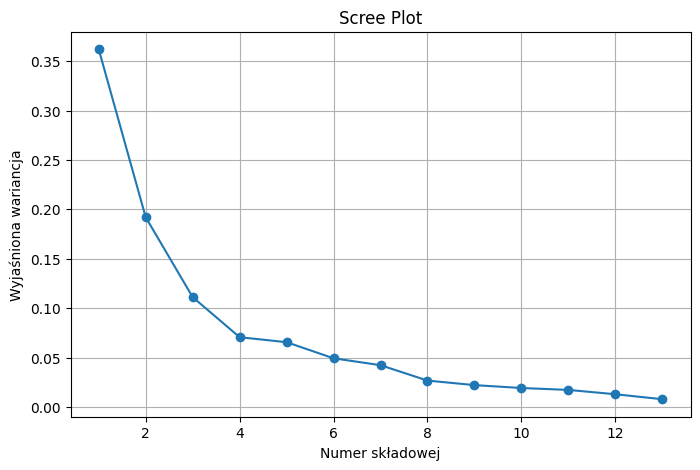

In [34]:
#3.1
plt.figure(figsize=(8,5))
plt.plot(range(1, 14), explained_variance, marker='o')
plt.xlabel("Numer składowej")
plt.ylabel("Wyjaśniona wariancja")
plt.title("Scree Plot")
plt.grid()
plt.show()


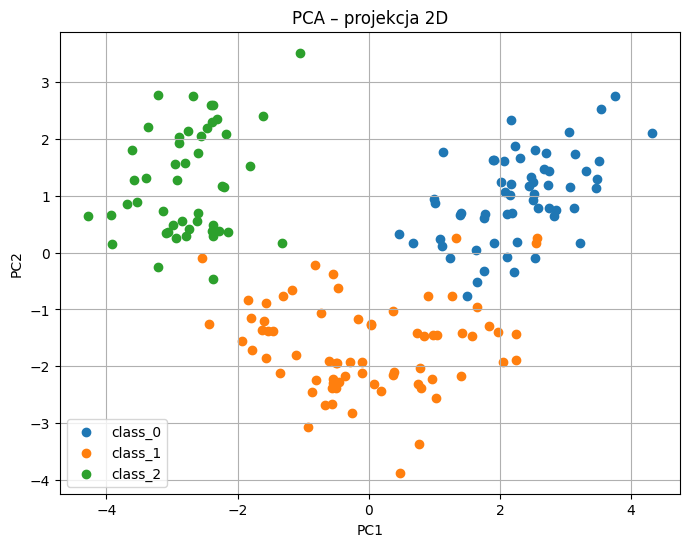

In [35]:
#3.2
plt.figure(figsize=(8,6))
for i, label in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=label
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – projekcja 2D")
plt.legend()
plt.grid()
plt.show()

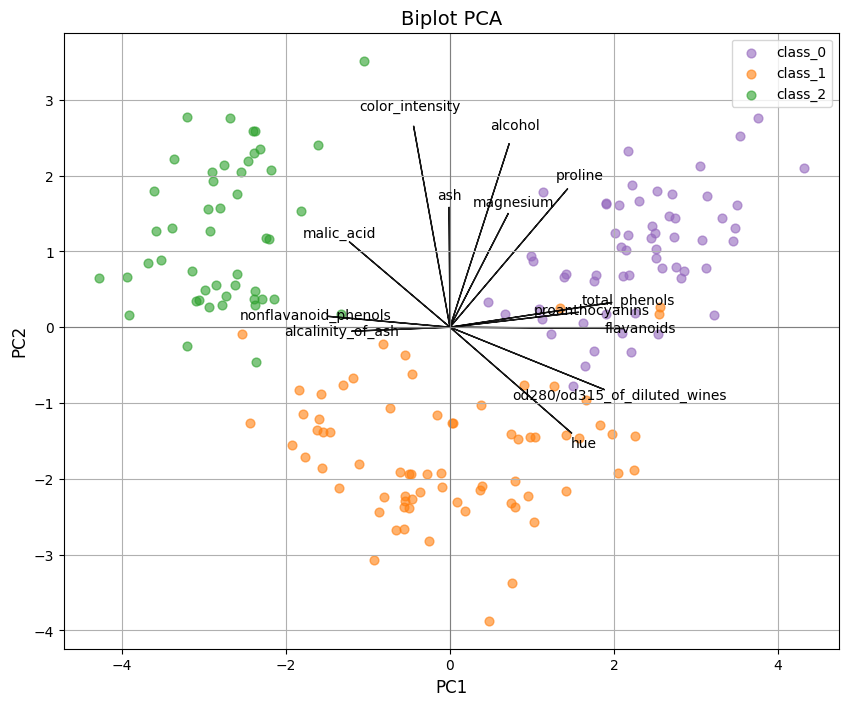

In [36]:
#3.3
plt.figure(figsize=(10, 8))

# kolory klas (jak na screenie)
class_colors = ['tab:purple', 'tab:orange', 'tab:green']

# punkty danych
for i, color in enumerate(class_colors):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=f"class_{i}",
        alpha=0.6,
        s=40,
        color=color
    )

# skala strzałek
arrow_scale = 5

# wektory cech (czarne strzałki)
for i, feature in enumerate(feature_names):
    x = pca.components_[0, i] * arrow_scale
    y_vec = pca.components_[1, i] * arrow_scale

    plt.arrow(
        0, 0,
        x, y_vec,
        color='black',
        alpha=0.9,
    )

    plt.text(
        x * 1.1,
        y_vec * 1.1,
        feature,
        fontsize=10,
        ha='center',
        va='center'
    )

# opisy osi i legenda
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.title("Biplot PCA", fontsize=14)
plt.legend()
plt.grid(True)

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

plt.show()


In [11]:
#4.1
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=["PC1", "PC2"],
    index=feature_names
)

loadings

,PC1,PC2
alcohol,0.144329,0.483652
malic_acid,-0.245188,0.224931
ash,-0.002051,0.316069
alcalinity_of_ash,-0.239320,-0.010591
magnesium,0.141992,0.299634
total_phenols,0.394661,0.065040
flavanoids,0.422934,-0.003360
nonflavanoid_phenols,-0.298533,0.028779
proanthocyanins,0.313429,0.039302
color_intensity,-0.088617,0.529996


#4.2
Dominujące cechy PC1 to : flavanoids, total_phenols,proline, alcohol
PC1 reprezentuje ogólną jakość / bogactwo fenolowe wina
Dominujące cechy PC2 to : color_intensity,hue,od280/od315
PC2 opisuje kolor i optykę wina
Tak, klasy są separowalne w 2D

In [12]:
#5.1
pca_raw = PCA()
X_pca_raw = pca_raw.fit_transform(X)

pca_raw.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

#5.2
Bez standaryzacji występuje cecha dominująca,
separacja klas jest gorsza, oraz mylna może być interpretacja.
#5.3 Proline

In [13]:
#6.1
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42
)

In [14]:
#6.2
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9444444444444444

In [15]:
#6.2
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_2, y, test_size=0.2, random_state=42
)

knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

1.0

In [26]:
#6.2
pca_5 = PCA(n_components=5)
X_pca_5 = pca_5.fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_5, y, test_size=0.2, random_state=42
)

knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.9444444444444444